## Import Data ##

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

files = os.listdir()
data = [f for f in files if f.endswith(".csv")]

if data:
    df = pd.read_csv(data[0])
else:
    print("No data files found in the directory.")

df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1
...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1


In [4]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [26]:
def drop():
    global X
    global y
    
    X = df.drop(columns=["HeartDisease"])
    y = df["HeartDisease"]

drop()
df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1
...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1


## Data Clean Up ##

In [28]:
stats.zscore(df) #Find outliers

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,0.918558,1.066186,-1.056150,-0.696033,1.047939,0.048800,0.816497
1,0.219290,-0.937923,-1.359271,0.627571,0.013448,1.014025,-1.224745
2,-0.759684,-0.937923,-1.510832,-0.718854,-0.388854,-0.408035,0.816497
3,1.198265,1.066186,-1.510832,-0.878599,0.703109,-1.983493,0.816497
4,-1.249171,-0.937923,0.459456,-1.266552,0.818052,-0.722217,0.816497
...,...,...,...,...,...,...,...
495,-1.458951,-0.937923,-0.260457,1.608864,1.565185,1.073240,-1.224745
496,-0.969464,-0.937923,1.179369,0.604750,1.450241,0.816887,-1.224745
497,-0.689757,1.066186,0.989918,-1.061165,-0.791156,0.436809,-1.224745
498,0.009510,-0.937923,-0.980370,-1.471939,0.703109,-1.066451,0.816497


In [30]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(500, 7)

In [32]:
df.isna().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [34]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

drop()

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [36]:
drop()
df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1
...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1


## Statistical Modeling ##

In [38]:
df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


In [40]:
df.corr()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
Age,1.000000,-0.017147,0.031548,-0.014161,0.023712,-0.378599,0.258298
Gender,-0.017147,1.000000,-0.039109,0.025246,-0.010883,0.010276,-0.011454
BloodPressure,0.031548,-0.039109,1.000000,-0.037793,-0.070828,0.105652,-0.116973
Cholesterol,-0.014161,0.025246,-0.037793,1.000000,0.014156,0.549047,-0.423530
HeartRate,0.023712,-0.010883,-0.070828,0.014156,1.000000,0.113533,-0.102720
QuantumPatternFeature,-0.378599,0.010276,0.105652,0.549047,0.113533,1.000000,-0.775160
HeartDisease,0.258298,-0.011454,-0.116973,-0.423530,-0.102720,-0.775160,1.000000


In [42]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0.00000000e+000, 4.11327996e-116, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

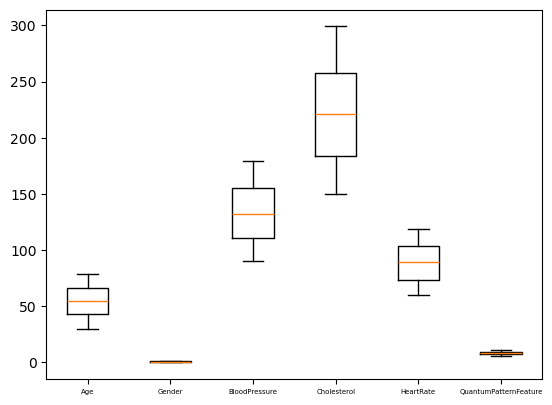

In [44]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

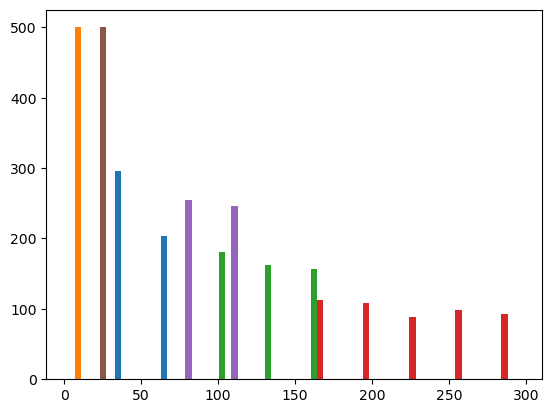

In [46]:
plt.hist(X)
plt.show()

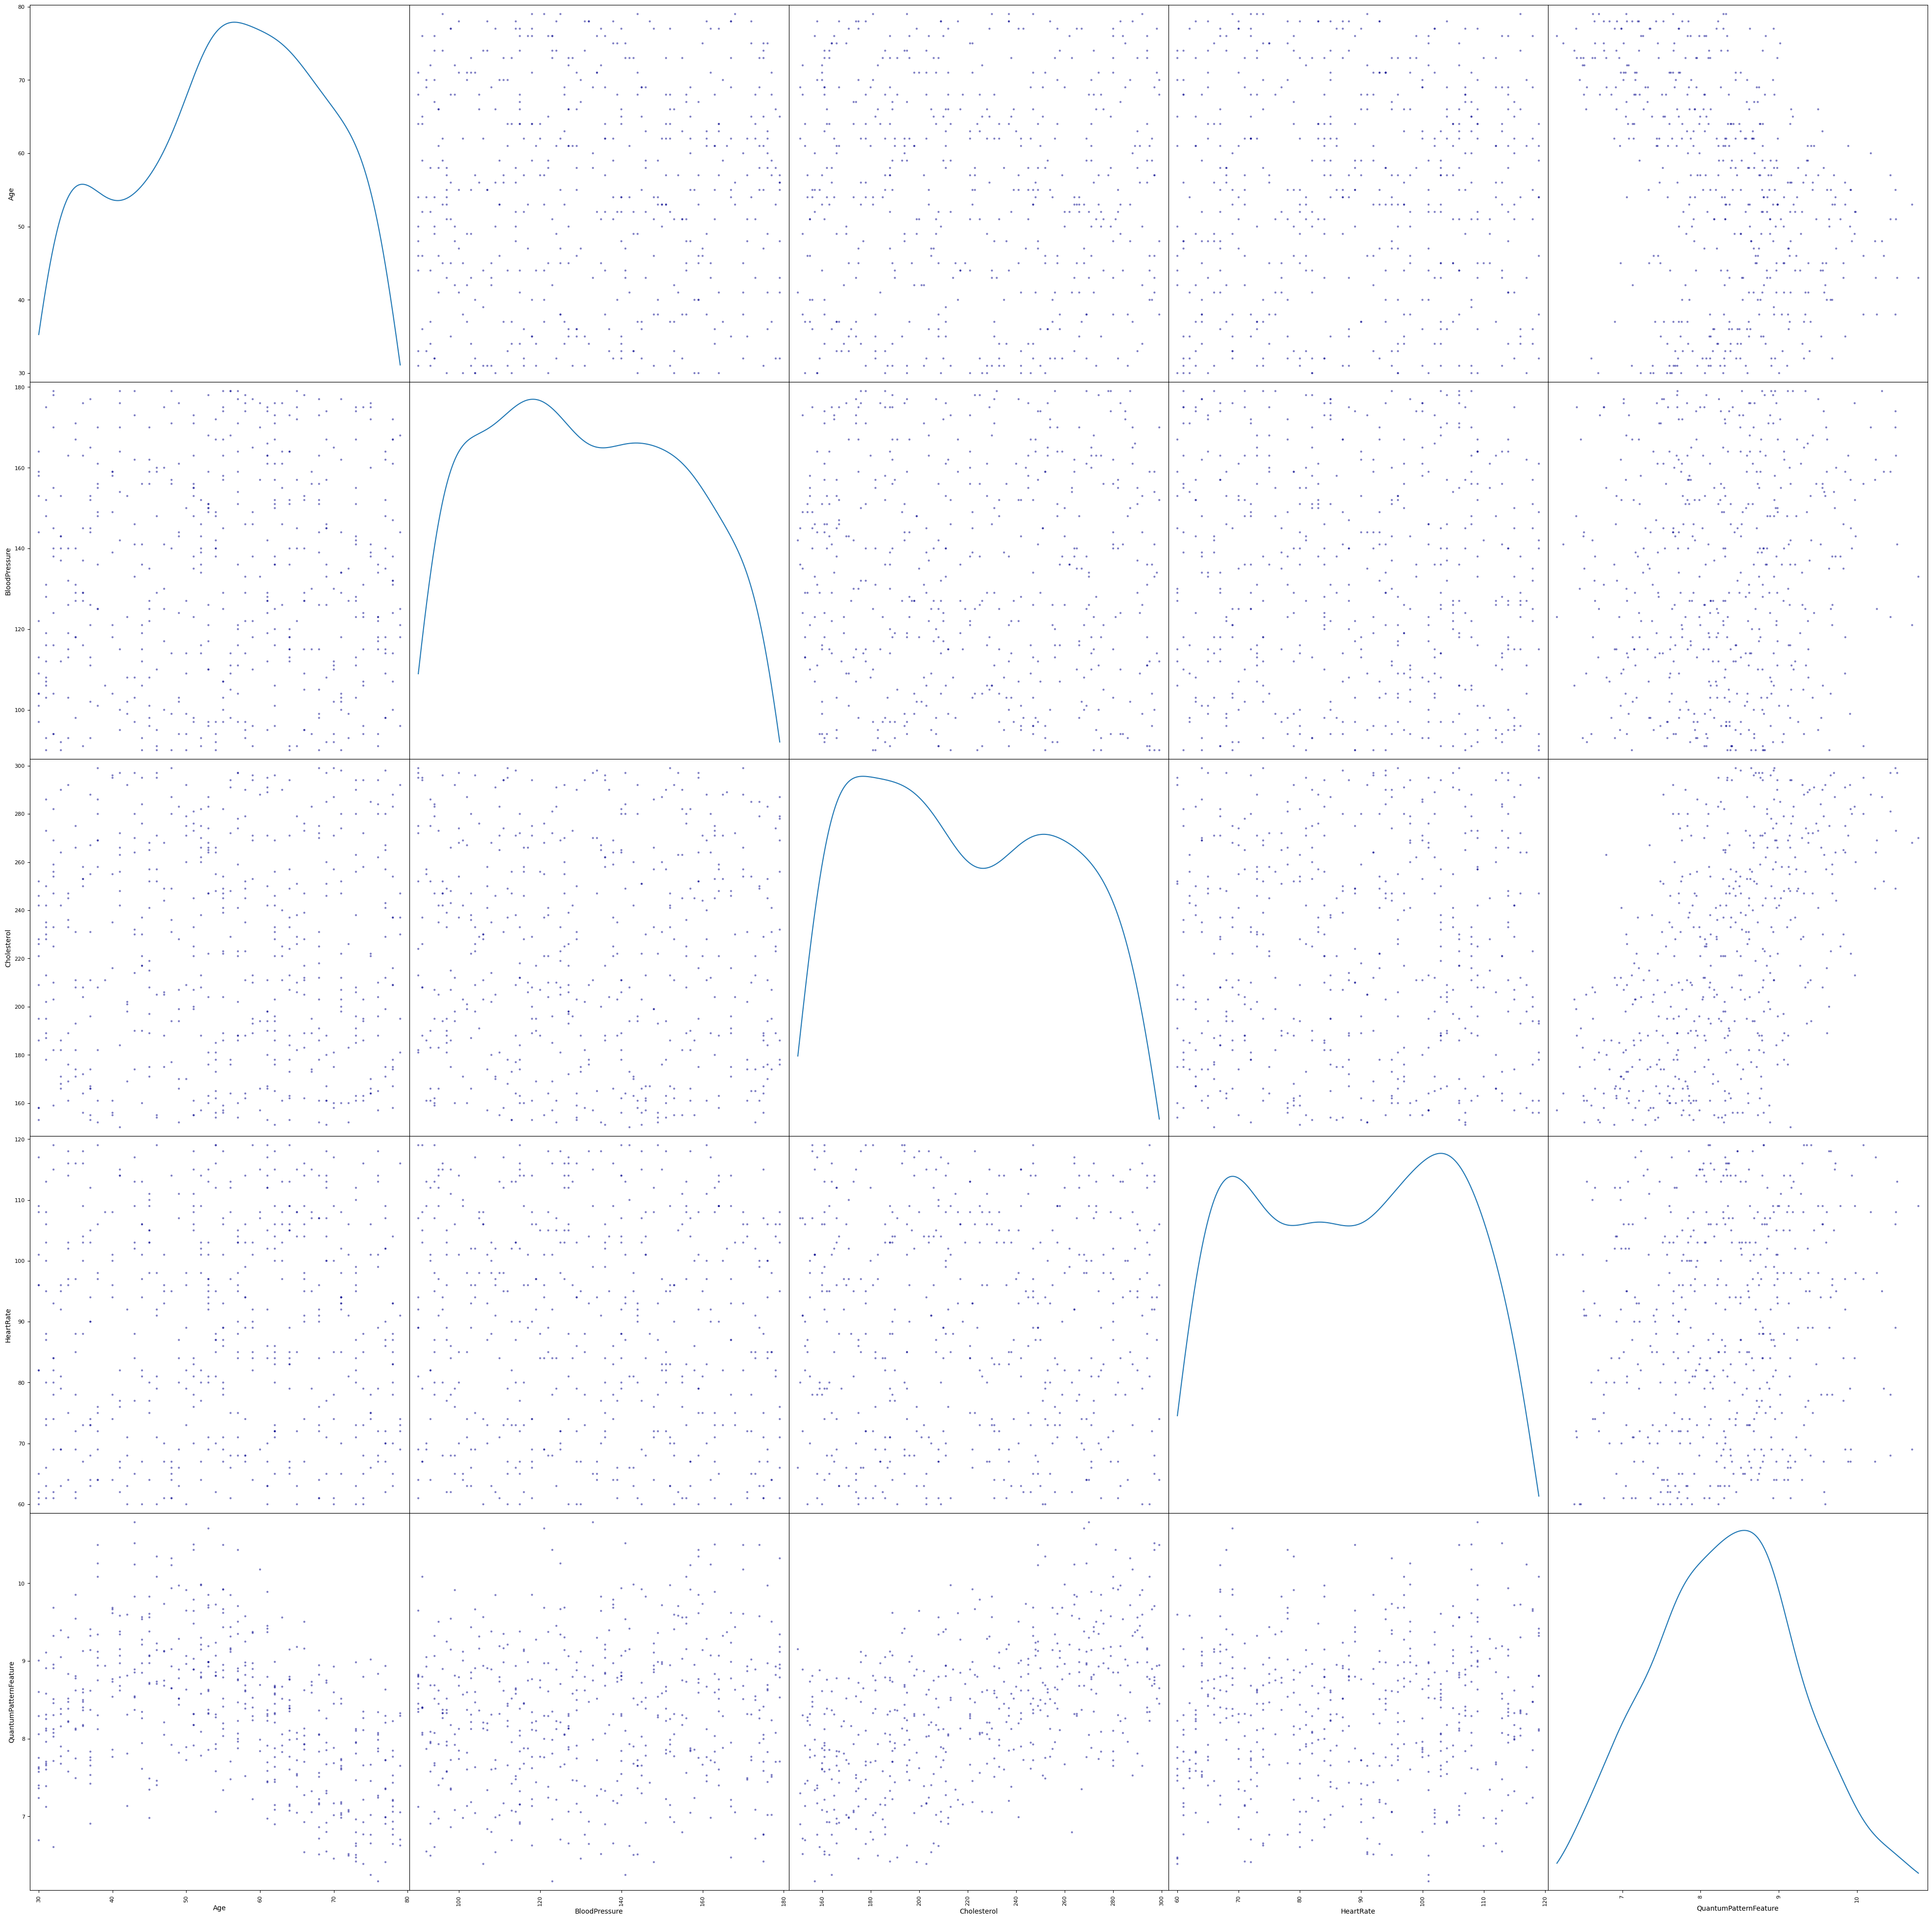

In [85]:
from pandas.plotting import scatter_matrix

scatter_matrix(X[["Age","BloodPressure","Cholesterol","HeartRate","QuantumPatternFeature"]], alpha = 0.5, figsize = (50, 50), diagonal = "kde", c="#00008B");

## Fine-Tuning ##

Switch all classifiers to regressors when dealing with quantitative data predictions (i.e. temperature, pay, etc.)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.08     | 8.116     | 19.06     | 15.18     |
| 2         | -0.08571  | 12.37     | 3.964     | 4.808     |
| 3         | -0.08     | 2.104     | 17.46     | 12.82     |
| 4         | -0.09714  | 14.45     | 1.391     | 19.46     |
| 5         | -0.09429  | 16.82     | 5.034     | 5.273     |
| 6         | -0.09429  | 4.485     | 6.781     | 11.45     |
| 7         | -0.08     | 2.211     | 17.07     | 12.93     |
| 8         | -0.08     | 3.041     | 19.94     | 19.99     |
| 9         | -0.08     | 7.563     | 19.99     | 3.76      |
| 10        | -0.08     | 1.301     | 15.57     | 2.484     |
| 11        | -0.08     | 19.64     | 19.79     | 19.89     |
| 12        | -0.08     | 19.84     | 19.94     | 9.174     |
| 13        | -0.08     | 17.94     | 19.96     | 2.126     |
| 14        | -0.08     | 1.692     | 1.427     | 2.164     |
| 15    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

## Training Model ##

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

model1 = RandomForestClassifier(max_depth = 18, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model1, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.9066666666666666


In [163]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 19, min_samples_split = 15, random_state=42).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model2, "Heart.joblib")
    model = joblib.load("Heart.joblib")

Accuracy: 0.9066666666666666


In [95]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model3, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.6933333333333334


In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
import joblib


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
model4 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3).fit(X_train, y_train)

predictions = model4.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.586 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib
#Delete for qualitative predictions

linreg = LinearRegression()

param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

model5 = GridSearchCV(linreg, param_space, cv=10).fit(X_train, y_train)

score = model5.score(X, y)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model5, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.600744639475915


## Post-Training Analysis ##

In [165]:
y_predicted = model.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[56,  3],
       [11, 80]])

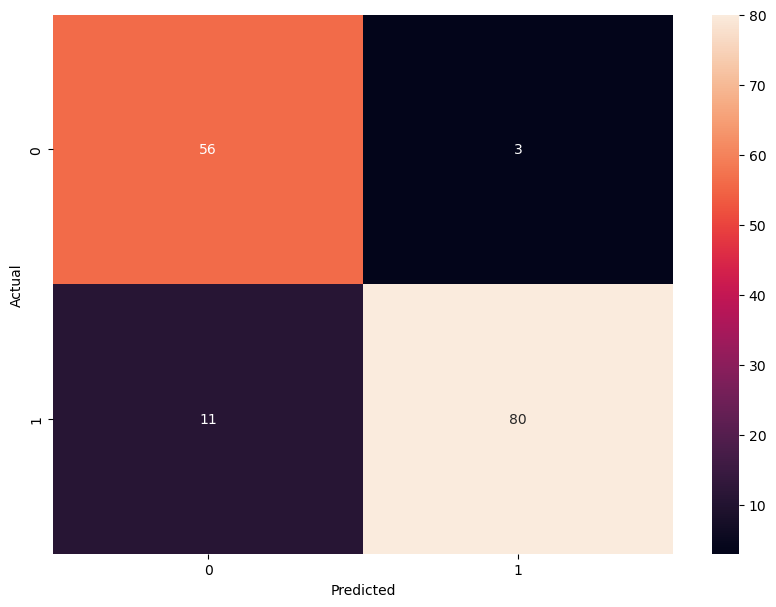

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [173]:
prob1 = model.predict_proba(X)[:, 1] #Probability of A doing y (1) in the future

In [175]:
prob2 = model.predict_proba(X[:len(df)]) #Probability of A doing y (0 or 1) in the future

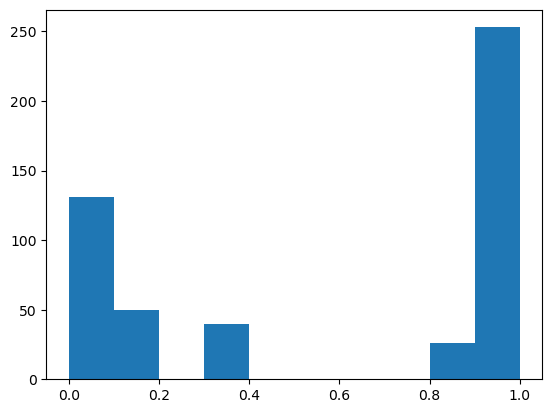

In [177]:
plt.hist(prob1)
plt.show()

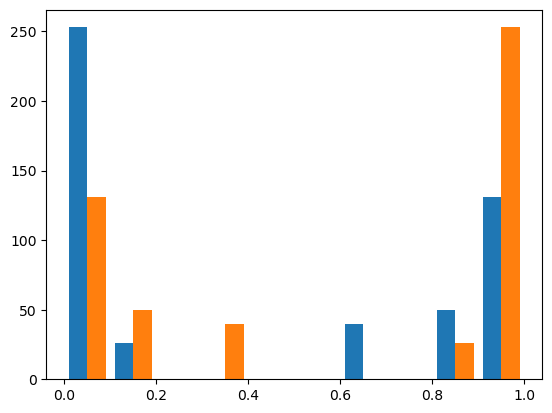

In [179]:
plt.hist(prob2)
plt.show()

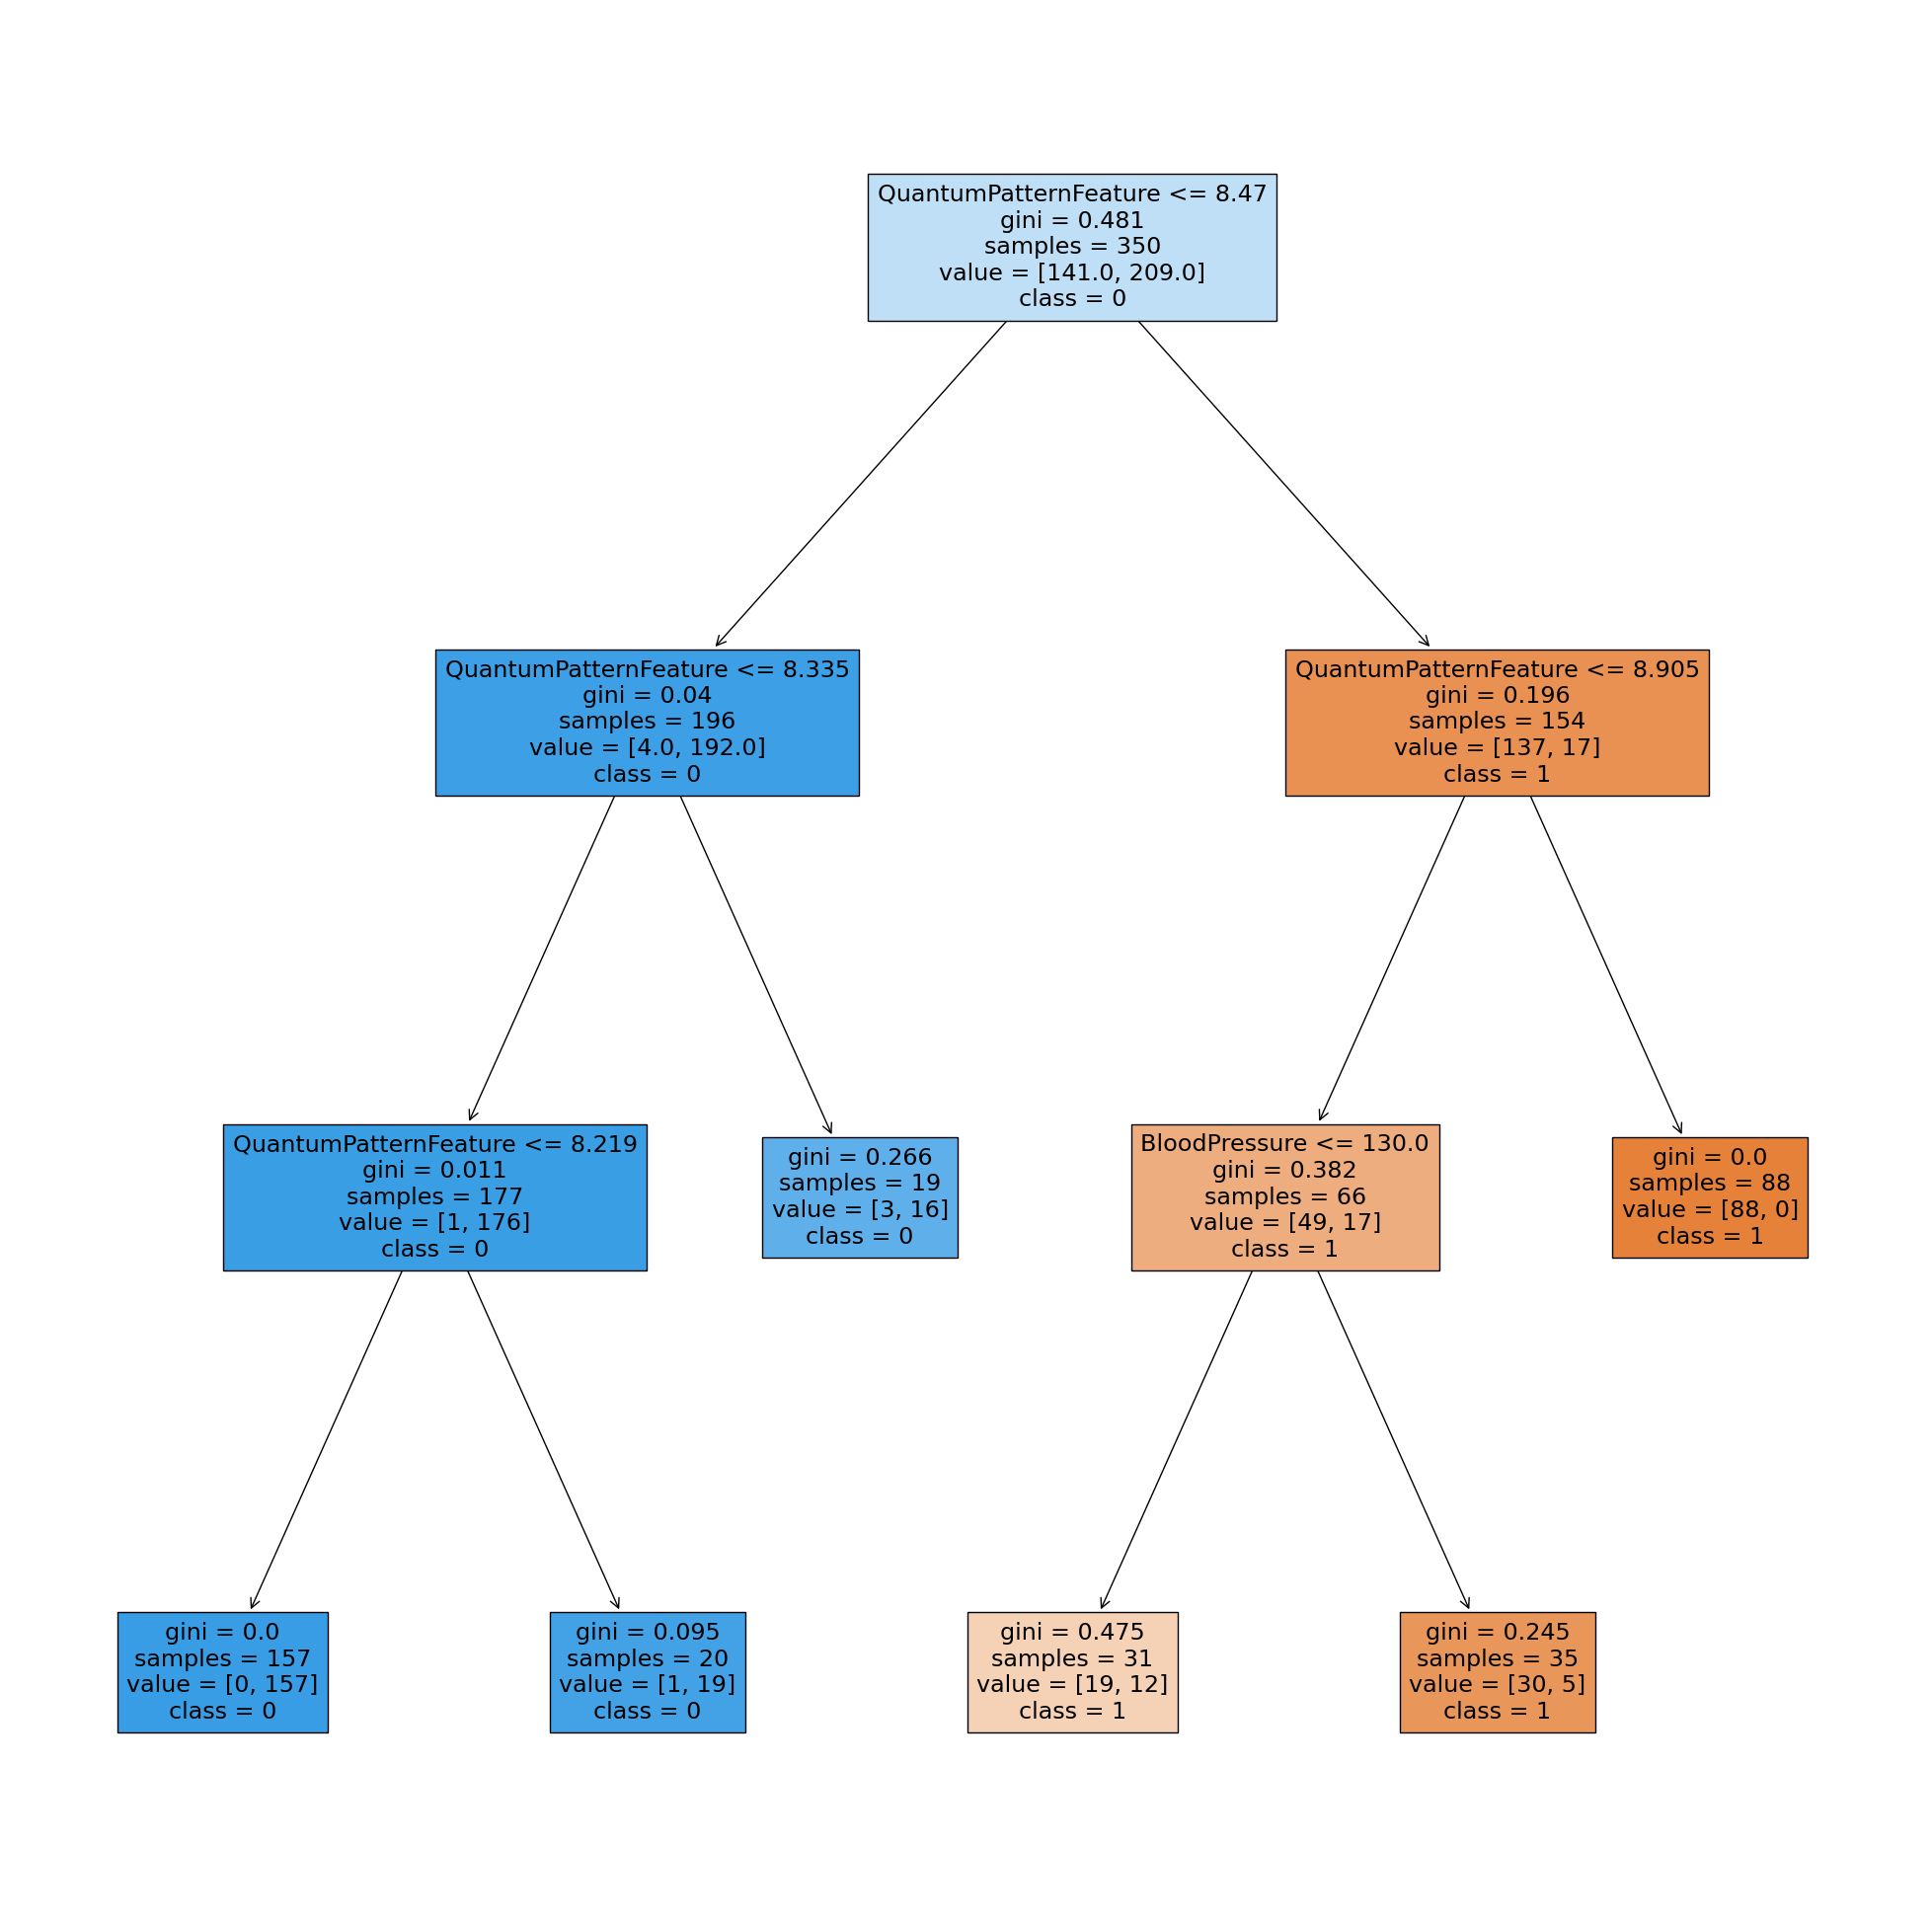

In [183]:
from sklearn.tree import plot_tree
#If the model is a decision tree use this for visualization

plt.figure(figsize=(25, 25))
plot_tree(model, feature_names=model.feature_names_in_, class_names=[str(label) for label in df["HeartDisease"].unique()], filled=True)
plt.show()